Uma série estacionária é uma série de dados que apresenta propriedades estatísticas constantes ao longo do tempo. Isso significa que a média, a variância e a autocovariância da série de dados não mudam ao longo do tempo. As séries estacionárias são comumente utilizadas em análises econômicas e financeiras, pois **é mais fácil prever o comportamento futuro de uma série estacionária do que de uma série não estacionária.**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8] 

In [95]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta_fase = input('Descreva a planta e a fase: ')
df_2 = df[df['PLANTA_PROCESSO'] == planta_fase]
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()
titulo_grafico = df_2['PLANTA_PROCESSO'].unique()[0]

In [96]:
df_g.head()

DATA
2017-08-31     151292.0
2017-09-30    3640588.0
2017-10-31    3714864.0
2017-11-30    3382492.0
2017-12-31    3136424.0
Freq: M, Name: TOTAL_VALOR, dtype: float64

Abaixo será realizado o teste proposto por Dick Fuller bastante comum para descobrir a estacionariedade.

Se o resultado do valor de P for menor que 0.05, então sugere que a série selecionada é Estacionária. Caso não, precisa transformar a série em estacionária para que aconteça melhor previsão.

Após o teste o script continua para realizar transformações (caso necessário) de duas formas - **LOG ou Diferenciação**

In [97]:

from statsmodels.tsa.stattools import adfuller

In [98]:
resultado_adf = adfuller(df_g)
print("ADF estatísticas: %f" % resultado_adf[0])
print("Valor de P: %f" % resultado_adf[1])
print("Valores Críticos: %f")
for key, value in resultado_adf[4].items():
    print('\t%s: %.3f' % (key,value))


ADF estatísticas: -2.419630
Valor de P: 0.136272
Valores Críticos: %f
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [99]:
# Função alternativa para teste Dickey-Fuller
def adf_test(df_g):
    print("Resultado do teste Dickey_fuller: ")
    dftest = adfuller(df_g, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p','# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = value
    print(dfoutput)

adf_test(df_g)

Resultado do teste Dickey_fuller: 
Teste                  -2.419630
Valor p                 0.136272
# de lags               1.000000
# de observações       59.000000
Valor Crítico (1%)     -3.546395
Valor Crítico (5%)     -2.911939
Valor Crítico (10%)    -2.593652
dtype: float64


### A partir daqui o script fará transformação via LOG

In [100]:
d_log = np.log(df_g)

Text(0.5, 1.0, 'Série transformada com o LOG')

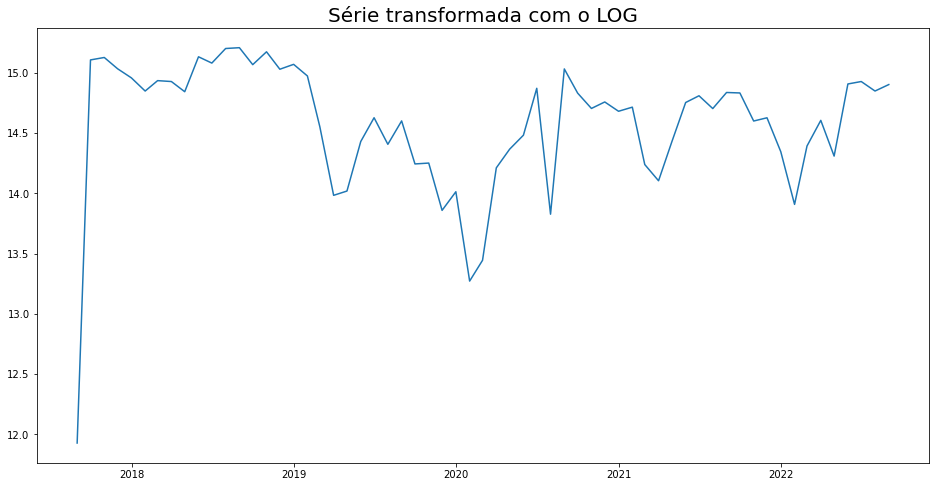

In [101]:
plt.plot(d_log)
plt.title("Série transformada com o LOG", fontsize=20)

Text(0.5, 1.0, 'Série original')

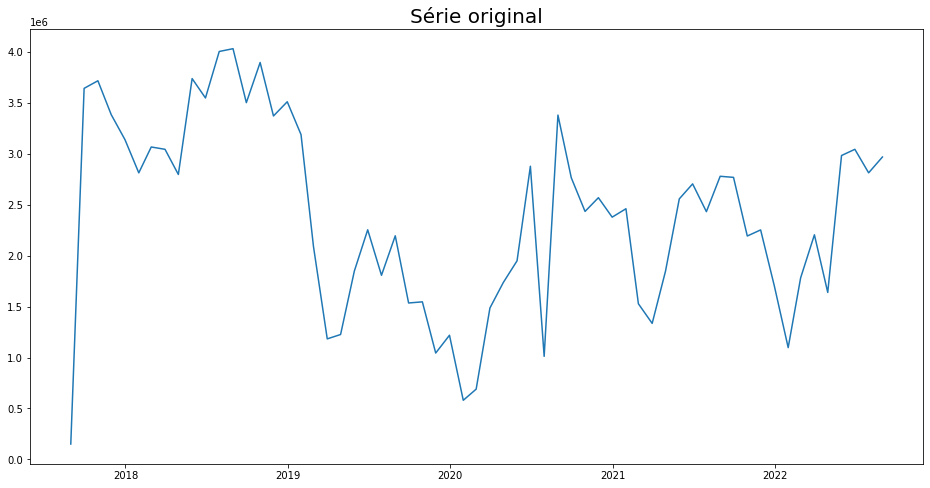

In [102]:
plt.plot(df_g)
plt.title("Série original",fontsize=20)

#### O script abaixo mostra a transformação alternativa, via Diferenciação

In [103]:
y_diff = np.diff(df_g)

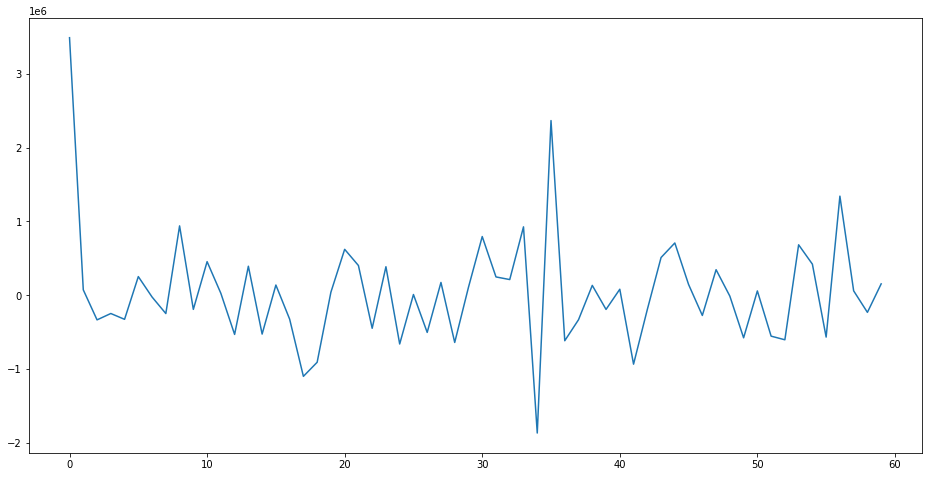

In [104]:
plt.plot(y_diff)

In [105]:
adf_test(y_diff)
#Quando o valor de p for em notação científica, logo é muito abaixo do 0,05

Resultado do teste Dickey_fuller: 
Teste                 -1.162937e+01
Valor p                2.282186e-21
# de lags              0.000000e+00
# de observações       5.900000e+01
Valor Crítico (1%)    -3.546395e+00
Valor Crítico (5%)    -2.911939e+00
Valor Crítico (10%)   -2.593652e+00
dtype: float64


In [106]:
y_diff2 = np.diff(y_diff)

In [107]:
adf_test(y_diff2)

Resultado do teste Dickey_fuller: 
Teste                 -1.107283e+01
Valor p                4.508526e-20
# de lags              1.000000e+00
# de observações       5.700000e+01
Valor Crítico (1%)    -3.550670e+00
Valor Crítico (5%)    -2.913766e+00
Valor Crítico (10%)   -2.594624e+00
dtype: float64


#### Existe uma terceira alternativa em que se aplica diferenciação com LOG e Médias Móveis

In [109]:
rolmean = df_g.rolling(window=12).mean()
rolstd = df_g.rolling(window=12).std()

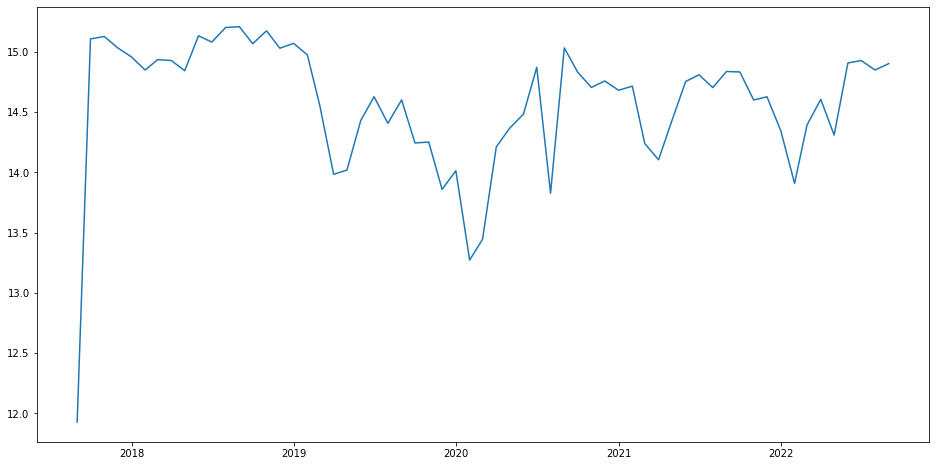

In [110]:
# Gerar o log
idLogScale = np.log(df_g)
plt.plot(idLogScale)

In [111]:
movAvg = idLogScale.rolling(window=12).mean()
movStd = idLogScale.rolling(window=12).std()

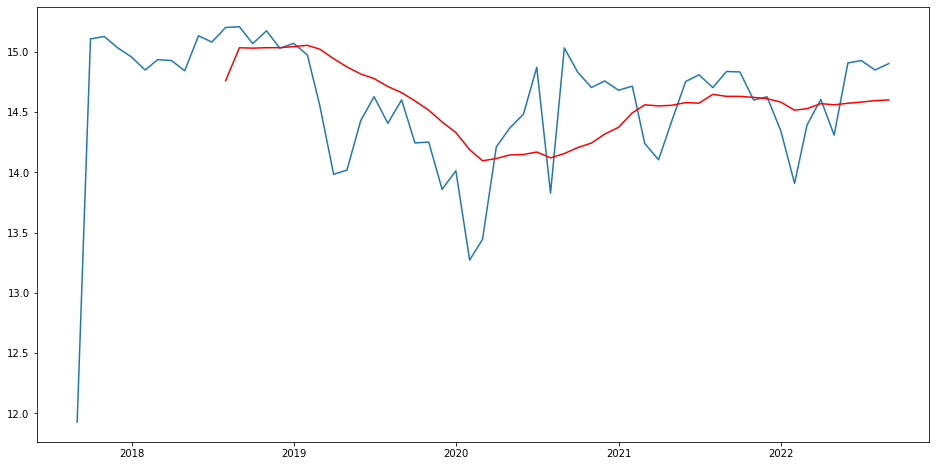

In [112]:
#Vamos comparar os dados com Log aplicado e a média móvel aplicada.
plt.plot(idLogScale)
plt.plot(movAvg, color='red')


In [113]:
dsLogMinusMA = idLogScale - movAvg
dsLogMinusMA.head(12)

DATA
2017-08-31         NaN
2017-09-30         NaN
2017-10-31         NaN
2017-11-30         NaN
2017-12-31         NaN
2018-01-31         NaN
2018-02-28         NaN
2018-03-31         NaN
2018-04-30         NaN
2018-05-31         NaN
2018-06-30         NaN
2018-07-31    0.441598
Freq: M, Name: TOTAL_VALOR, dtype: float64

In [114]:
dsLogMinusMA.dropna(inplace=True)
dsLogMinusMA.head(10)

DATA
2018-07-31    0.441598
2018-08-31    0.174892
2018-09-30    0.037325
2018-10-31    0.140080
2018-11-30   -0.004339
2018-12-31    0.026874
2019-01-31   -0.079916
2019-02-28   -0.470107
2019-03-31   -0.960264
2019-04-30   -0.856009
Freq: M, Name: TOTAL_VALOR, dtype: float64

Resultados do teste Dickey-Fuller: 
Estatistica de Teste    -3.470946
Valor de P               0.008765
# de intervalos          0.000000
# de observações        49.000000
Valor Critico (1%)      -3.571472
Valor Critico (5%)      -2.922629
Valor Critico (10%)     -2.599336
dtype: float64


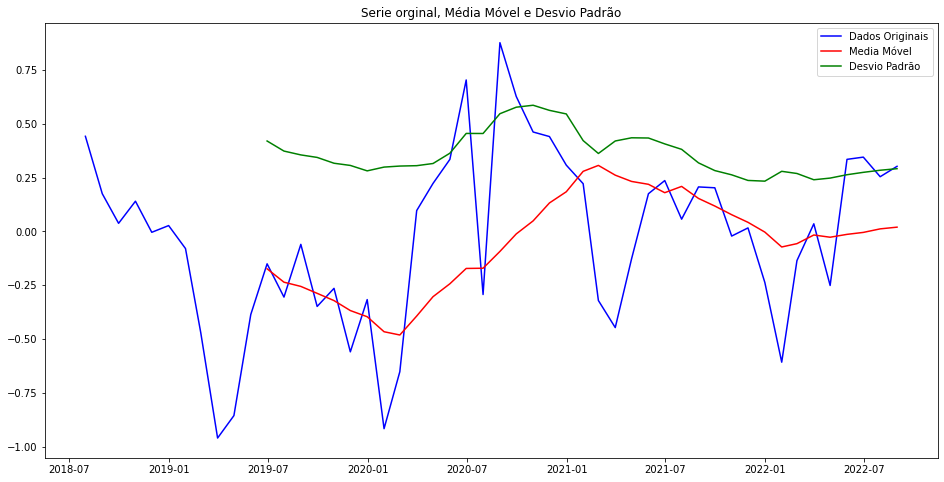

In [128]:
#função para aplicar a média móvel e mostrar os resultados
def teste_estacionariedade(dataset):
    movAvg = dataset.rolling(window=12).mean()
    movStd = dataset.rolling(window=12).std()

    orig = plt.plot(dataset, color='blue', label='Dados Originais')
    media = plt.plot(movAvg, color='red', label='Media Móvel')
    desvpad = plt.plot(movStd, color='green', label='Desvio Padrão')
    plt.legend(loc='best')
    plt.title("Serie orginal, Média Móvel e Desvio Padrão")

    print("Resultados do teste Dickey-Fuller: ")
    dftest = adfuller(dataset, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatistica de Teste', 'Valor de P', '# de intervalos', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Critico ({})'.format(key)] = value
    print(dfoutput)

teste_estacionariedade(dsLogMinusMA)